<a href="https://colab.research.google.com/github/KacperKaszuba0608/ML_projects/blob/main/Classifying_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Guided Project: Classifying Heart Disease</h1></center>

In this project I will looking at a real-life dataset: The [Heart Disease Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease) from the UCI Machine Learning Reporsitory. This data set contains clinical informations about patients, including age and chest pain. I will try to classify the presence of **heart disease** for each patient.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

In [2]:
# reading in dataset
heart = pd.read_csv('https://raw.githubusercontent.com/KacperKaszuba0608/Datasets/main/heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
heart = heart.drop('Unnamed: 0', axis=1)
heart.shape

(303, 14)

The data set has 14 column and 303 rows. The description of the columns are below.
Columns:
* `age` - age of the patient in years
* `sex` - sex of the patient (1 = male, 0 = female)
* `cp` - type of chest pain:
    - Value 1: typical angina,
    - Value 2: atypical angina,
    - Value 3: non-anigmal pain,
    - Value 4: asymptomatic
* `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
* `chol` - serum cholestoral in mg/dl
* `fbs` - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* `restecg` - resting electrocardiographic results:
    - Value 0: normal,
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* `thalach` - maximum heart rate achieved
* `exang` -  exercise induced angina (1 = yes; 0 = no)
* `oldpeak` - ST depression induced by exercise relative to rest
* `slope` - the slope of the peak exercise ST segment:
    - Value 1: upsloping,
    - Value 2: flat,
    - Value 3: downsloping
* `ca` - number of major vessels (0-3) colored by flourosopy
* `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect
* `present` - diagnosis of heart disease (angiographic disease status):
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

## Exploring the Dataset

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


Most of the columns are of the numeric type, except for the `ca` and `thal` columns, which is interesting because these columns contain numeric values. Most of the values are small, except for the `age`, `trestbps`, `chol` and `thalach`. Transformations are likely to be needed. We also should convert some features into dummy variables. It will be `cp`, `restecg`, `slope` and `thal`.

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
# checking the values of object type columns
for i in ['ca', 'thal']: print(heart[i].value_counts())

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64
thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64


In [7]:
heart[['ca', 'thal']] = heart[['ca', 'thal']].replace('?', np.nan)
heart = heart.dropna().astype('float')

In [8]:
# checking the values of object type columns after removing missing values
for i in ['ca', 'thal']: print(heart[i].value_counts())

ca
0.0    174
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64


We remove missing values ('?') and now we have a clean dataset. The summary of the numerical columns doesn't look strange, so we can check the distribution of the continuous variables.

<ipython-input-9-e3c6fd9b7b03>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  heart[conti_var].hist(ax=ax)


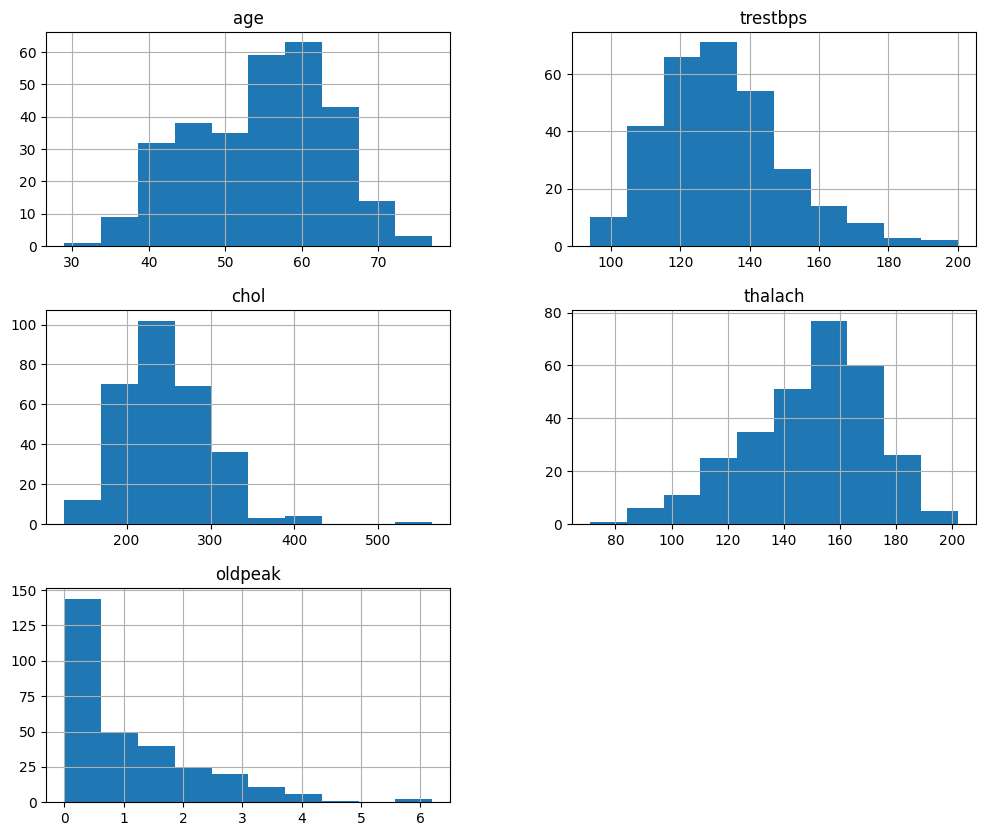

In [9]:
# plotting the distributions of continous features
conti_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, ax = plt.subplots(figsize=(12,10))
heart[conti_var].hist(ax=ax)
plt.show()

The first histogram has distribution similar to normal, but next three have skewed distribution, so we should transform them, because when we compare them with other columns it can make some mistakes.

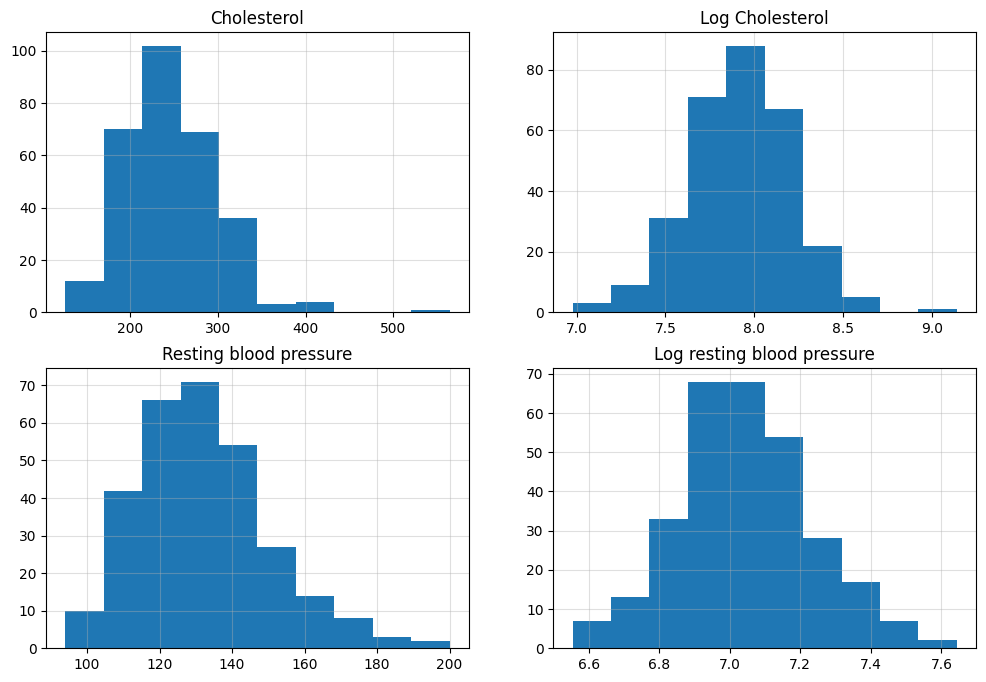

In [10]:
# logarithmic transforamtion of chol and trestbps columns
heart['log_chol'] = np.log2(heart['chol'])
heart['log_trestbps'] = np.log2(heart['trestbps'])

# plotting the results
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(heart['chol'])
ax1.set_title('Cholesterol')
ax1.grid(alpha=0.4)

ax2.hist(heart['log_chol'])
ax2.set_title('Log Cholesterol')
ax2.grid(alpha=0.4)

ax3.hist(heart['trestbps'])
ax3.set_title('Resting blood pressure')
ax3.grid(alpha=0.4)

ax4.hist(heart['log_trestbps'])
ax4.set_title('Log resting blood pressure')
ax4.grid(alpha=0.4)

plt.show()

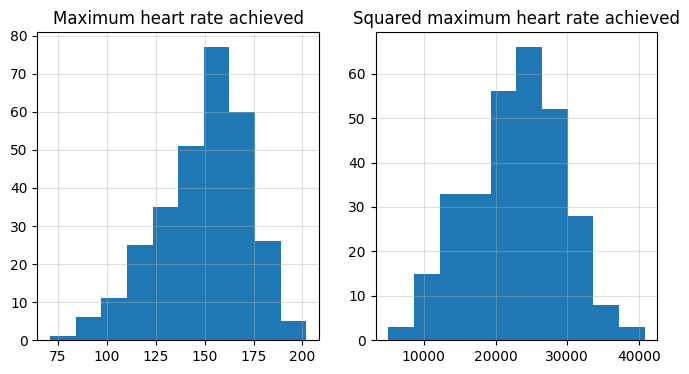

In [11]:
# transforamtion of thalach column
heart['sq_thalach'] = heart['thalach']**2

# plotting the result of transformation
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(heart['thalach'])
ax1.set_title('Maximum heart rate achieved')
ax1.grid(alpha=0.4)

ax2.hist(heart['sq_thalach'])
ax2.set_title('Squared maximum heart rate achieved')
ax2.grid(alpha=0.4)

plt.show()

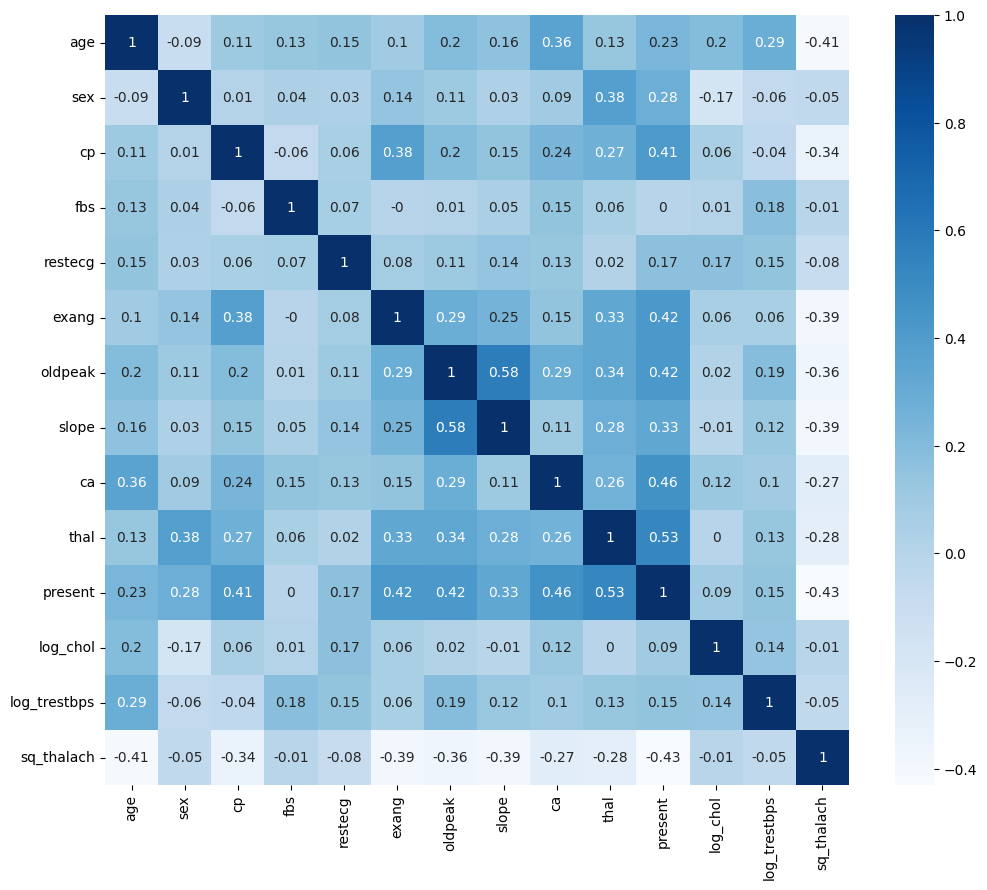

In [12]:
# calculating the correlations between features
corrs = round(heart.drop(['chol', 'trestbps', 'thalach'],axis=1).corr(),2)

# plotting the heatmap of correlations
plt.figure(figsize=(12,10))
sns.heatmap(corrs, cmap='Blues', annot=True)
plt.show()

As we can see in the heatmap above, most of the variables have a correlation with the target variable (`present`). Only 4 columns have a weak correlation, so we will drop them from the dataset and also remove the columns that we have transformed. But first we will have a closer look at the columns `log_chol` and `log_trestbps`, because these columns should have an impact on the target variable.

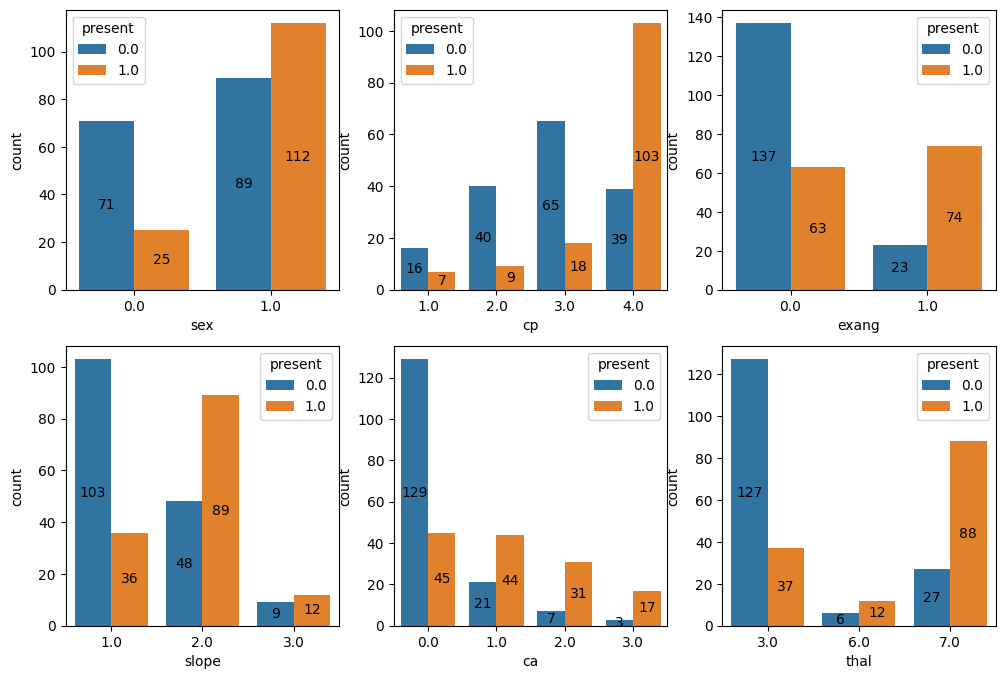

In [13]:
# list of categorical features
cat_f = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']

fig = plt.figure(figsize = (12,8))

# plotting the countplot
for idx, cat in enumerate(cat_f):
    plot = plt.subplot(2,3, idx+1)
    sns.countplot(x=heart[cat], hue=heart['present'], ax=plot)
    # adding the label to plots
    for container in plot.containers:
        plot.bar_label(container, label_type="center")

Describing histograms above we can tell:
1. Most males have heart diseases,
2. Asymptomatic type of chest pain (4) has the higest impact on the heart disease,
3. Exercise induced angina has notable impact,
4. Most people with heart diseases have flat type of slope,
5. The more major vessels (0-3) stained by flouroscopy the number of heart diseases is higher,
6. Most patient have reversable defect of heart

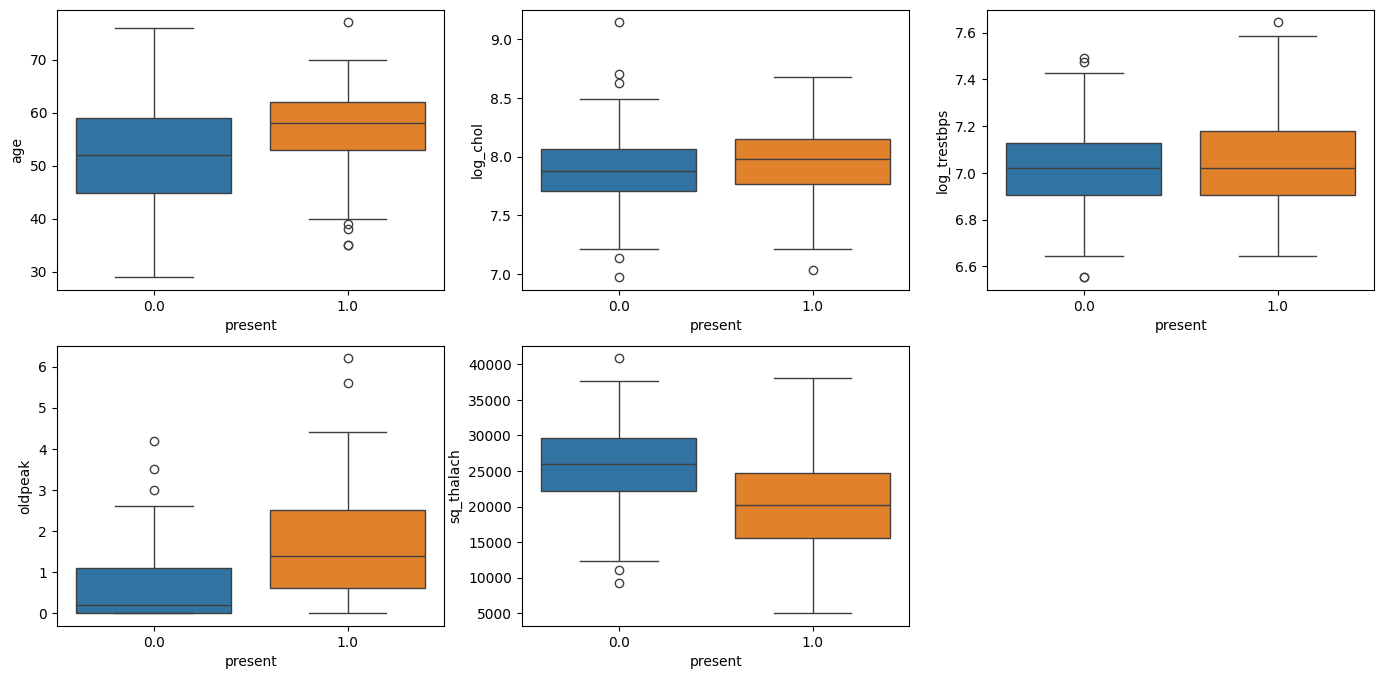

In [14]:
# lit of continous features
conti_f = ['age', 'log_chol', 'log_trestbps', 'oldpeak', 'sq_thalach']

fig = plt.figure(figsize = (17,8))

# plotting the boxplots
for idx, cat in enumerate(conti_f):
    plot = plt.subplot(2,3, idx+1)
    sns.boxplot(y=heart[cat], x=heart['present'], ax=plot, hue=heart['present'])
    plot.get_legend().remove()

The box plots above show that:
1. Most old people have heart disease.
2. Cholesterol levels and resting blood pressure don't have a significant effect.
3. Patients with ST depression often have heart disease.
4. Patinets with heart disease have lower maximum heart rate.

Based on the feature analysis we can remove some columns (`chol`, `trestbps`, `fbs`, `restecg`).

In [15]:
# cleaning dataset
heart_clean = heart.drop(['chol', 'trestbps', 'fbs', 'restecg', 'thalach', 'log_chol', 'log_trestbps'], axis=1)
heart_clean.head()

,age,sex,cp,exang,oldpeak,slope,ca,thal,present,sq_thalach
0,63.0,1.0,1.0,0.0,2.3,3.0,0.0,6.0,0.0,22500.0
1,67.0,1.0,4.0,1.0,1.5,2.0,3.0,3.0,1.0,11664.0
2,67.0,1.0,4.0,1.0,2.6,2.0,2.0,7.0,1.0,16641.0
3,37.0,1.0,3.0,0.0,3.5,3.0,0.0,3.0,0.0,34969.0
4,41.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0.0,29584.0


After droping columns we have to do something else. Namely we have to create dummy variables of categorical features.

In [16]:
# creating dummy variables for categorical features
heart_final = pd.get_dummies(heart_clean, columns=['cp', 'slope', 'ca', 'thal'])
heart_final.head()

,age,sex,exang,oldpeak,present,sq_thalach,cp_1.0,cp_2.0,cp_3.0,cp_4.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,0.0,2.3,0.0,22500.0,True,False,False,False,False,False,True,True,False,False,False,False,True,False
1,67.0,1.0,1.0,1.5,1.0,11664.0,False,False,False,True,False,True,False,False,False,False,True,True,False,False
2,67.0,1.0,1.0,2.6,1.0,16641.0,False,False,False,True,False,True,False,False,False,True,False,False,False,True
3,37.0,1.0,0.0,3.5,0.0,34969.0,False,False,True,False,False,False,True,True,False,False,False,True,False,False
4,41.0,0.0,0.0,1.4,0.0,29584.0,False,True,False,False,True,False,False,True,False,False,False,True,False,False


Now we can move to the building the model.

## Dividing the Data

We will divide the data into training and test sets with percentages of 80% and 20%.

In [17]:
from sklearn.model_selection import train_test_split

# separate features and target
X = heart_final.drop('present', axis=1)
y = heart_final['present']

# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=123)

In [18]:
y_train.value_counts()

present
0.0    149
1.0    128
Name: count, dtype: int64

In [19]:
y_test.value_counts()

present
0.0    11
1.0     9
Name: count, dtype: int64

As we see both datasets have cases and non-cases, so we can build the Logistic Regression Model.

## Building the Model

In [20]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Accuracy on train set
train_accuracy = model1.score(X_train, y_train)

In [21]:
# Sensitivity
predictions = model1.predict(X_train)

tp = int(sum(predictions[y_train == 1] == 1))
fn = int(sum(predictions[y_train == 1] == 0))
train_sensitivity = tp / (tp + fn)

In [22]:
# Specificity
tn = sum((y_train == 0) & (predictions == 0))
fp = sum((y_train == 0) & (predictions == 1))
train_specificity = tn / (tn + fp)

In [23]:
pd.DataFrame({'Accuracy':train_accuracy, 'Sensitivity':train_sensitivity, 'Specificity':train_specificity}, index=['train'])

,Accuracy,Sensitivity,Specificity
train,0.819495,0.765625,0.865772


As we see above our model predict better the 0 class (patient doesn't have heart disease). The accuracy is quite good for the train dataset.

## Interpreting the Model Coefficients

In [24]:
# extracting intercept of the model
intercept = model1.intercept_
# calculating the odds
np.exp(intercept[0])

1.0324961616358275

As we can see, the odds are slightly above 1, suggesting that the probability of the two classes happening is approximately equal.

In [25]:
# extracting coefs of the model
coefs = model1.coef_
# calculating the odds ratio of coefs
odds_ratio = np.exp(*coefs)

for i in range(X.shape[1]):
    print(f'{X.columns[i]}: {round(odds_ratio[i],6)}')

age: 1.004381
sex: 1.399303
exang: 1.407396
oldpeak: 2.505908
sq_thalach: 0.999932
cp_1.0: 0.960094
cp_2.0: 0.888866
cp_3.0: 0.742304
cp_4.0: 1.629863
slope_1.0: 0.751407
slope_2.0: 1.346755
slope_3.0: 1.020279
ca_0.0: 0.65178
ca_1.0: 1.192322
ca_2.0: 1.21785
ca_3.0: 1.090923
thal_3.0: 0.608144
thal_6.0: 1.027547
thal_7.0: 1.652245


Interpreating the coefficients we can say that sex, exercise induced angina, ST depression induced by exercise relative to rest, chest pain of type 4, flat slope of the peak exercise ST segment,  number of major vessels 1 and 2 colored by flourosopy and reversable defect have particular impact on heart disease.

Interesting is that age and maximum heart rate doesn't have any effect of the presence of heart disease.

The results of the coefficients are quite good, as they coincide with the conclusions drawn from the diagnostic charts.

## Final Model Evaluation

Now let's calculate some metrics of the binary classification.

In [26]:
from sklearn.metrics import confusion_matrix

# Accuracy on train set
test_accuracy = model1.score(X_test, y_test)

In [27]:
# Sensitivity
predictions = model1.predict(X_test)

tp = int(sum(predictions[y_test == 1] == 1))
fn = int(sum(predictions[y_test == 1] == 0))
test_sensitivity = tp / (tp + fn)

In [28]:
# Specificity
tn = sum((y_test == 0) & (predictions == 0))
fp = sum((y_test == 0) & (predictions == 1))
test_specificity = tn / (tn + fp)

In [29]:
pd.DataFrame({'Accuracy':[train_accuracy, test_accuracy],
              'Sensitivity':[train_sensitivity, test_sensitivity],
              'Specificity':[train_specificity, test_specificity]},
             index=['train', 'test'])

,Accuracy,Sensitivity,Specificity
train,0.819495,0.765625,0.865772
test,0.950000,0.888889,1.000000


The metrics shows as that our model has very good accuracy (0.95). It has some problems with predicting 1 class, but has 100% effectiveness on 0 class.

In [30]:
confusion_matrix(y_test, predictions)

array([[11,  0],
       [ 1,  8]])

The model predict wrong only 1 patient. It's quite good result.

## Conclusion

The model results and metrics are very good, used features and their coefficients were correct. The model seem to predict the non-cases better than the other and this happend because the number of 0 class was little bit higher than 1 class.

The accuracy on traing set is 0.82 and on the test set 0.95 and I think this is accpetable for use in an actual clinical setting.